In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Predicting GPS from SAT score by Linear Regression


We've collected the data with Attendance information, so we can split and make better predictions when someone has good or not school attendance.



In [2]:
raw_data = pd.read_csv('1.03. Dummies.csv')

In [3]:
data = raw_data.copy()

In [4]:
data['Attendance'] = data['Attendance'].map({'Yes':1,'No':0})

In [5]:
data.describe()

,SAT,GPA,Attendance
count,84.000000,84.000000,84.000000
mean,1845.273810,3.330238,0.464286
std,104.530661,0.271617,0.501718
min,1634.000000,2.400000,0.000000
25%,1772.000000,3.190000,0.000000
50%,1846.000000,3.380000,0.000000
75%,1934.000000,3.502500,1.000000
max,2050.000000,3.810000,1.000000


In [17]:
data.head(10)

,SAT,GPA,Attendance
0,1714,2.40,0
1,1664,2.52,0
2,1760,2.54,0
3,1685,2.74,0
4,1693,2.83,0
5,1670,2.91,0
6,1764,3.00,0
7,1764,3.00,0
8,1792,3.01,0
9,1850,3.01,0


In [22]:
#brief check for missing values
data.isnull().sum()

SAT           0
GPA           0
Attendance    0
dtype: int64

## Regression Analysis


#### Ordinary Least Squares (OLS) Estimation

In [6]:
y = data['GPA'] #dependent variable
x1 = data[['SAT','Attendance']] #independent variables

In [7]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

/Users/DouT/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     52.70
Date:                Tue, 10 Mar 2020   Prob (F-statistic):           2.19e-15
Time:                        15:10:29   Log-Likelihood:                 25.798
No. Observations:                  84   AIC:                            -45.60
Df Residuals:                      81   BIC:                            -38.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6439      0.358      1.797      0.076      -0.069       1.357
SAT            0.0014      0.000      7.141      0.000       0.001       0.002
Attendance     0.2226      0.041      5.451      0.000       0.141       0.304
==============================================================================
Omnibus:                       19.560   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.189
Skew:                          -1.028   Prob(JB):                     1.25e-06
Kurtosis:                       4.881   Cond. No.                     3.35e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The small P values indicate that we can reject the null hypothesis that SAT and Attendance do not affect GPS.
Higher r squared indicates that our model could explain a lot of the response variability. Introducing other variables could give us more precision.
In regression analysis, we'd like our regression model to have significant variables and to produce a high R-squared value, but in this regression, we can get a good explanation of GPS.
We will show graphs to help interpret regression analysis results more intuitively.

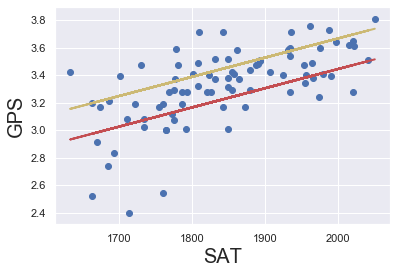

In [8]:
plt.scatter(data['SAT'],y)
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='r')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='y')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPS', fontsize = 20)
plt.show()

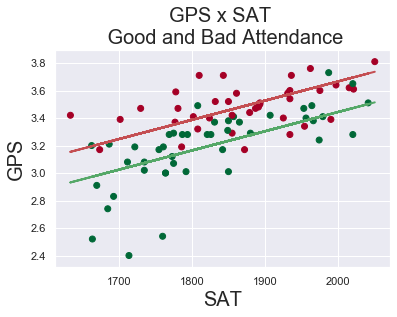

In [24]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='g')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='r')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPS', fontsize = 20)
plt.title('GPS x SAT \n Good and Bad Attendance', fontsize = 20)
plt.show()

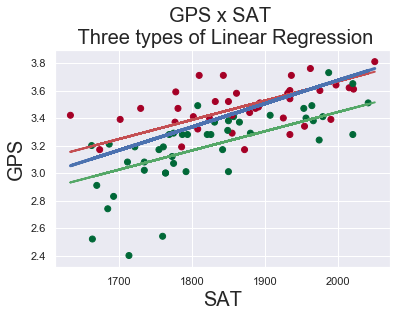

In [23]:
plt.scatter(data['SAT'],y,c=data['Attendance'],cmap = 'RdYlGn_r')
yhat_no = 0.6439 + 0.0014*data['SAT']
yhat_yes = 0.8665 + 0.0014*data['SAT']
yhat = 0.0017*data['SAT']+0.275
fig = plt.plot(data['SAT'],yhat_no, lw=2, c='g', label = 'regression line 1')
fig = plt.plot(data['SAT'],yhat_yes, lw=2, c='r', label = 'regression line 2')
fig = plt.plot(data['SAT'],yhat, lw=3, c='b', label = 'regression line')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('GPS', fontsize = 20)
plt.title('GPS x SAT \n Three types of Linear Regression', fontsize = 20)
plt.show()

As we can see above, by using the attendance information, we can do better predictions.

### Predictiting GPS from new students

In [12]:
new_data = pd.DataFrame({'const':1,'SAT':[1700,1670],'Attendance':[0,1]})
new_data = new_data[['const','SAT','Attendance']]

In [13]:
new_data

,const,SAT,Attendance
0,1,1700,0
1,1,1670,1


In [14]:
new_data.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance
Bob,1,1700,0
Alice,1,1670,1


In [15]:
predictions = results.predict(new_data)
predictions

0    3.023513
1    3.204163
dtype: float64

In [16]:
predictionsdf = pd.DataFrame({'Predictions': predictions})
joined = new_data.join(predictionsdf)
joined.rename(index={0:'Bob',1:'Alice'})

,const,SAT,Attendance,Predictions
Bob,1,1700,0,3.023513
Alice,1,1670,1,3.204163
